In [8]:
import seaborn as sns
import pandas as pd

cars = pd.read_csv("../Cleaning/new_clean_data.csv", index_col=0)
columns = [
    "brand",
    "model",
    "price",
    "mileage",
    "year",
    "location",
    "date_added",
    "body_type",
    "fuel",
    "power",
    "transmission",
    "color",
    "price_new",
    "engine_size",
]
sns.set_theme()


In [9]:
# this function returns bins and labels in order to use them for the data division
def bins_labels(max, interval, unit, initial_value):
    bins = []
    labels = []
    bins.append(initial_value)
    labels.append("0" + str(unit) + "-" + str(interval + bins[-1]) + unit)
    # print("bin-1",bins[-1])
    while max > bins[-1]:
        bins.append(bins[-1] + interval)
        labels.append(str(bins[-1]) + unit + "-" + str(interval + bins[-1]) + unit)
    bins.append(float("inf"))
    labels.pop()
    labels.append(str(bins[-2]) + unit + "+")
    return {"bins": bins, "labels": labels}


In [10]:
# divide prices in intervals

price_sorted_bins_labels = bins_labels(
    max=100000, interval=10000, unit="k", initial_value=0
)
# print(price_sorted_bins_labels)
# bins = [0, 10000, 20000, 30000, 40000, 50000, 60000,70000,80000,90000,100000,float('inf')]  # Define your desired intervals
labels = [
    "0-10k",
    "10k-20k",
    "20k-30k",
    "30k-40k",
    "40k-50k",
    "50k-60k",
    "60k-70k",
    "70k-80k",
    "80k-90k",
    "90k-100k",
    "100k+",
]
cars["price_sorted"] = pd.cut(
    cars["price"], bins=price_sorted_bins_labels["bins"], labels=labels
)


730000.0


In [11]:
# devide mileage in intervals to visualize them
mileage_bins_labels = bins_labels(
    max=600000, interval=100000, unit="km", initial_value=0
)
cars["_mileage"] = pd.cut(
    cars["mileage"],
    bins=mileage_bins_labels["bins"],
    labels=mileage_bins_labels["labels"],
)


<Axes: >

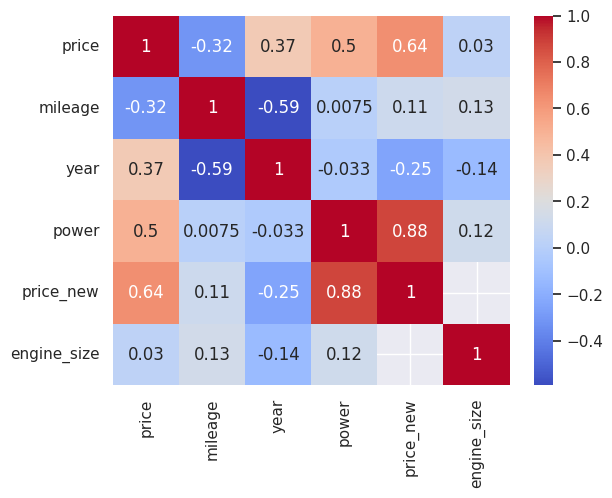

In [12]:
# correlation matrix between all float values
float_columns = cars.select_dtypes(include=["float", "int"]).columns

correlation = cars[float_columns].corr()
sns.heatmap(
    correlation,
    annot=True,
    cmap="coolwarm",
)


Text(0.5, 1.0, 'Price vs Year')

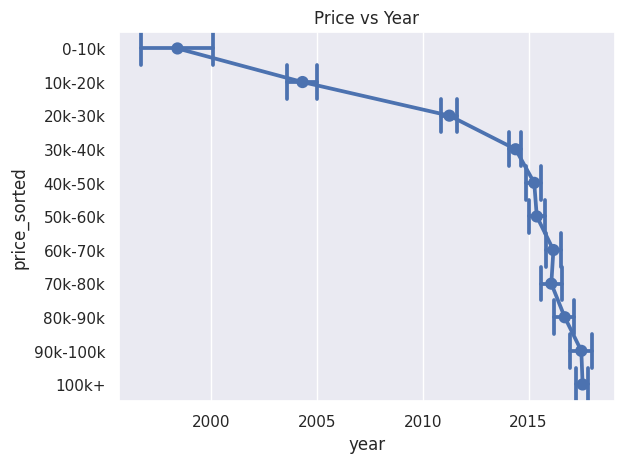

In [13]:
# price vs year
price_per_year = sns.pointplot(data=cars, y="price_sorted", x="year", capsize=True)
price_per_year.set_title("Price vs Year")


Text(0.5, 1.0, 'Price vs Power')

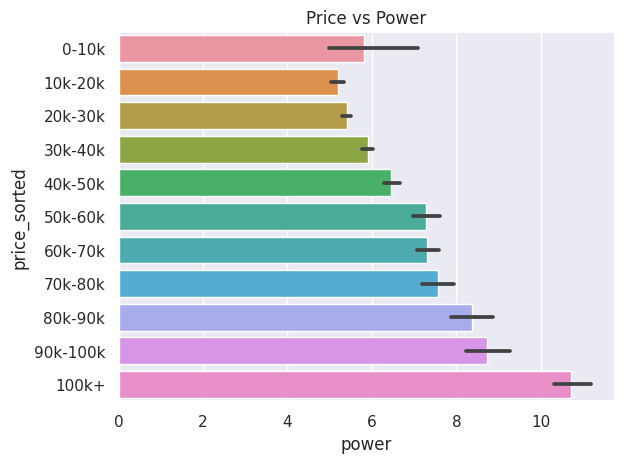

In [14]:
# price vs POWER
price_per_year = sns.barplot(data=cars, y="price_sorted", x="power")
price_per_year.set_title("Price vs Power")


/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Price vs New price')

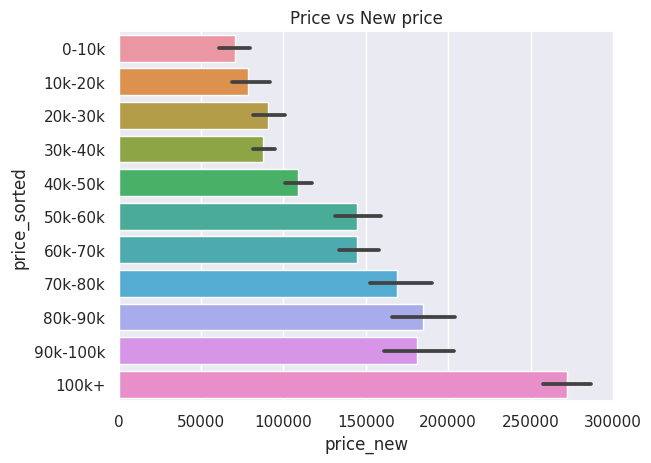

In [15]:
# price vs New price
price_per_year = sns.barplot(data=cars, y="price_sorted", x="price_new")
price_per_year.set_title("Price vs New price")


Text(0.5, 1.0, 'Price vs mileage')

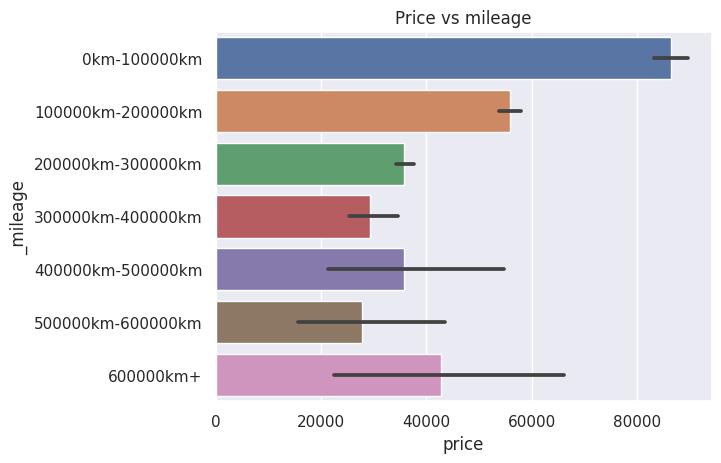

In [16]:
# Price vs Mileage

price_per_mileage = sns.barplot(
    data=cars,
    y="_mileage",
    x=columns[2],
)
price_per_mileage.set_title("Price vs mileage")


/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/azizb/anaconda3/envs/data-science/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarni

Text(0.5, 1.0, 'new price per power')

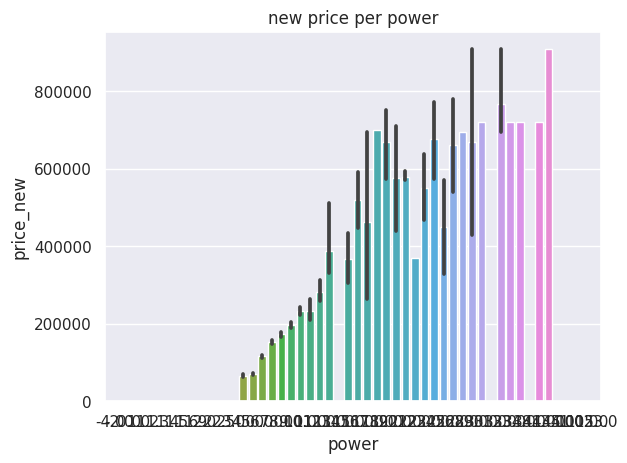

In [17]:
# New Price vs Power
price_per_year = sns.barplot(data=cars, y="price_new", x="power")
price_per_year.set_title("new price per power")


<Axes: title={'center': 'Count of Cars per Mileage'}, xlabel='count', ylabel='_mileage'>

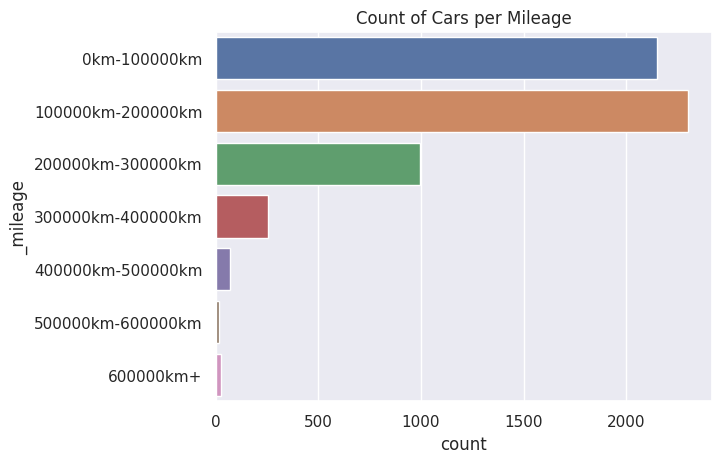

In [18]:
# Cars for sell per mileage
count_milage = sns.countplot(data=cars, y="_mileage")
count_milage.set_title("Count of Cars per Mileage")
count_milage


<Axes: title={'center': 'Count Of cars Price Inverval'}, xlabel='count', ylabel='price_sorted'>

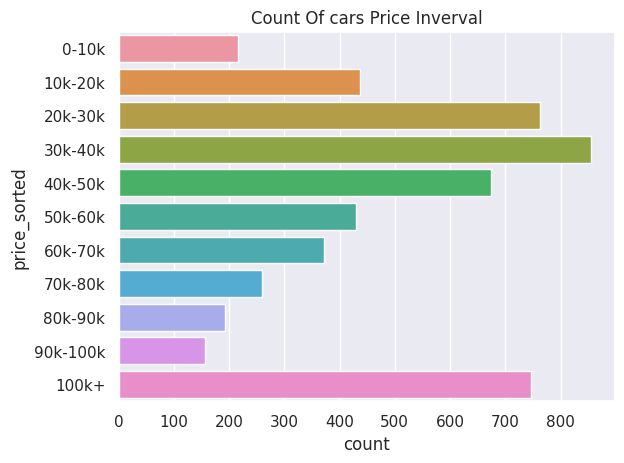

In [19]:
# Cars per Price Interval
count_price = sns.countplot(data=cars, y="price_sorted")
count_price.set_title("Count Of cars Price Inverval")
count_price


Text(0.5, 1.0, 'Price vs Mileage')

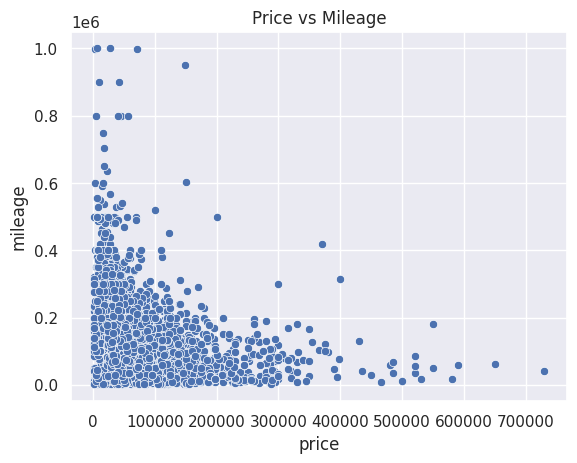

In [20]:
# Price vs Mileage

price_vs_mileage = sns.scatterplot(
    data=cars,
    y="mileage",
    x="price",
)
price_vs_mileage.set_title("Price vs Mileage")


Text(0.5, 1.0, 'Price per Engine size')

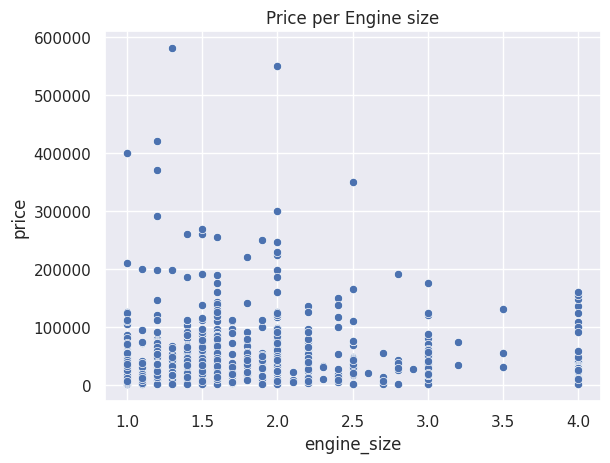

In [21]:
# price per engine size
engine_size_price = sns.scatterplot(data=cars, x="engine_size", y=columns[2])
engine_size_price.set_title("Price per Engine size")
